<a href="https://colab.research.google.com/github/NirobxHasan/Titanic-Kaggle-Competition/blob/main/TitanicFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h4><b>My profile:</b> `https://www.kaggle.com/nirobxhasan `<br></h4>

<h4>Kaggle Score: 0.81100</h4>
<br><br>


<h1><b>Kaggle Install on Google Collab</b></h1>

In [ ]:
#install depenencies
!pip install kaggle

In [ ]:
#upload the credentials of the kaggle account, which is j JSON file.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nirobxhasan","key":"50199b0c02e97a97199eb117c8543aa8"}'}

In [ ]:
#before importing the dataset we want to use this code

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Give permissions to avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#import the dataset we want to use for our project
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 22.8MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.18MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 28.0MB/s]


In [ ]:
#Show file on directory
!ls


gender_submission.csv  kaggle.json  sample_data  test.csv  train.csv


<h2>Import necessary package and library</h2>

In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import string

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler


# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import confusion_matrix 

<br>
<h1><b>Reading Dataset</b></h1><br>
Reading the Data from train and test dataset, Also combine together.

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

#Combine train and test dataframe.This function make a dataframe from two dataframes.
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

all_data = concat_df(train_df,test_df)

#This function returns divided dataframe of train and test set. 
def divide_df(all_data):
  return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

#this list contain both train and test dataframe.This is just list of dataframe.
dfs_list = [train_df,test_df] 


<br><br>
<h1><b>Data Analysis<b><h1>

In [ ]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


<b>Data preview</b>

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Train dataframe** has 891 rows(entries) and 12 columns(features) one of feature is target variable( Survived).

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Test dataframe** has 418 rows(entries) and 11 columns(features). we predict survived column.

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h2>Missing Values<h2>

In [ ]:
#This function show missing value in dataframe!
def missing_data(data):
  total = data.isnull().sum().sort_values(ascending=False)
  percent = (round(data.isnull().sum()/data.isnull().count()*100,1)).sort_values(ascending=False)  
  missing_df = pd.concat([total,percent], axis=1, keys = ['Total','percent'])
  missing_df = missing_df[missing_df['percent']>0]
  f,ax = plt.subplots(figsize=(8,6))
  plt.xticks(rotation = '90')
  fig=sns.barplot(missing_df.index,missing_df['percent'], color="blue",alpha=0.8)
  plt.xlabel('Features', fontsize=15)
  plt.ylabel('Percent of missing values', fontsize=15)
  plt.title('Percent missing data by feature', fontsize=15)
  return missing_df

,Total,percent
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


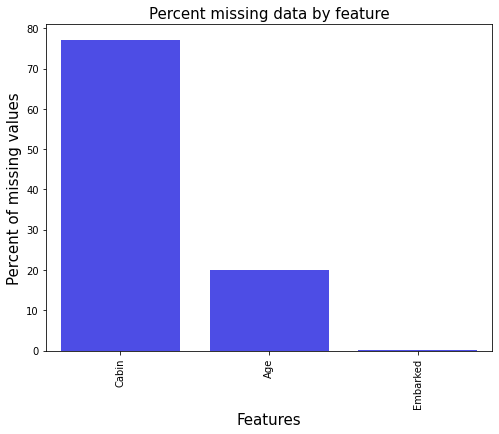

In [ ]:
missing_data(train_df)

We see that there are some missing values in train set, which are Cabin(77.1), Age(19.9%), Embarked(0.2%)
<br><br>

,Total,percent
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2


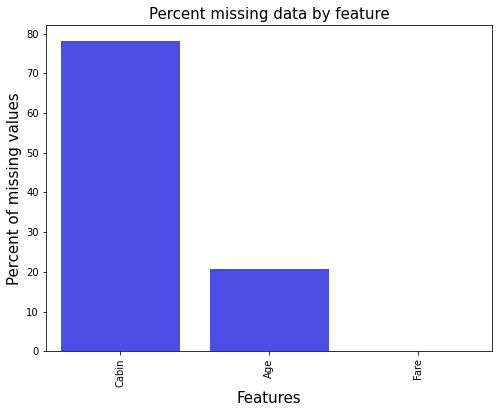

In [ ]:
missing_data(test_df)

Missing Values in test set are Cabin(78.2%),Age(20.6%),Fare(0.2%) <br><br>

<h2>Handle Missing value </h2>

<h4><b>Embarked</b></h4>

Embarked feature has only O.02% missing value,here we fill these value by maximum occurred value (statically mode), which is known as **Categorical Imputation** technique.

In [ ]:
all_data['Embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [ ]:
all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace = True)

<h4><b>Fare</b><h4>

**Fare  features** in Test dataframe has only one missing value,lets fill the missing value by median value.

In [ ]:
all_data['Fare'].fillna(all_data['Fare'].median(), inplace = True)

<h4><b>Age</b></h4>
Age feature has 20% missing data in both train and test set. But this feature is important for our model.So, we should take care of it.Age correlated with others feature and we will find correlation.Based on those correlation we will handle missing age values. 

<br>
<b>Relation between (Pclass and Age) VS Survived<b>




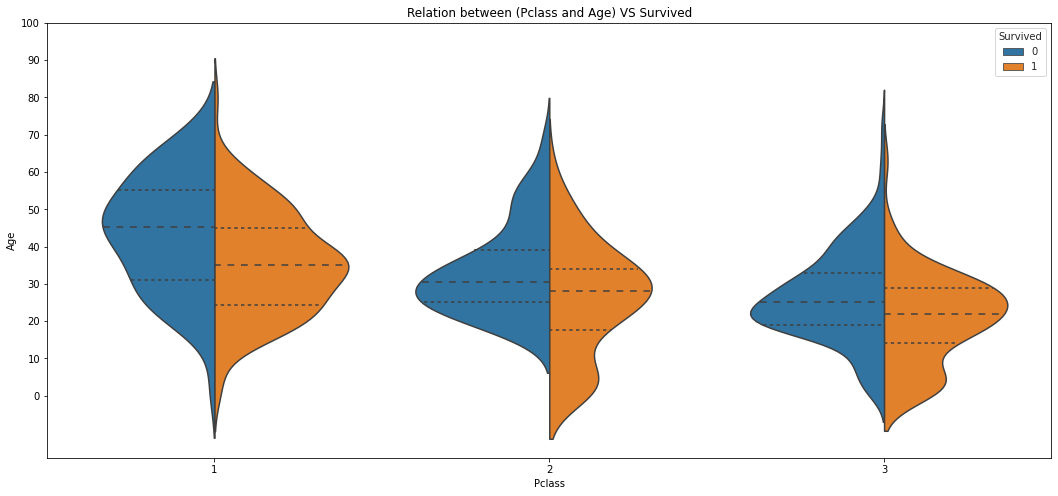

In [ ]:
fig, ax = plt.subplots(figsize = (18,8))
sns.set_style("whitegrid")
sns.violinplot("Pclass","Age",hue="Survived",data=train_df, split =True, inner="quartile", ax=ax)
ax.set_title('Relation between (Pclass and Age) VS Survived')
ax.set_yticks(range(0,110,10))
plt.show()

High chance to survive a person who has age between 18 to 50 in pclass 1.

<br><br>

<b>find correlation between age and others features</b>

In [ ]:
all_data_correlation = all_data.corr().abs().unstack().sort_values(ascending=False).reset_index()
all_data_correlation.rename(columns={'level_0':'Feature_1','level_1':'Feature_2',0:'Correlation'},inplace=True)
all_data_correlation[all_data_correlation['Feature_1']=='Pclass']

,Feature_1,Feature_2,Correlation
4,Pclass,Pclass,1.000000
8,Pclass,Fare,0.558683
10,Pclass,Age,0.408106
13,Pclass,Survived,0.338481
32,Pclass,SibSp,0.060832
35,Pclass,PassengerId,0.038354
43,Pclass,Parch,0.018322


Pclass strongly correlated with Fare, age and Survived
<br><br>

<b>Relation between (Sex and Age) VS Survived<b>

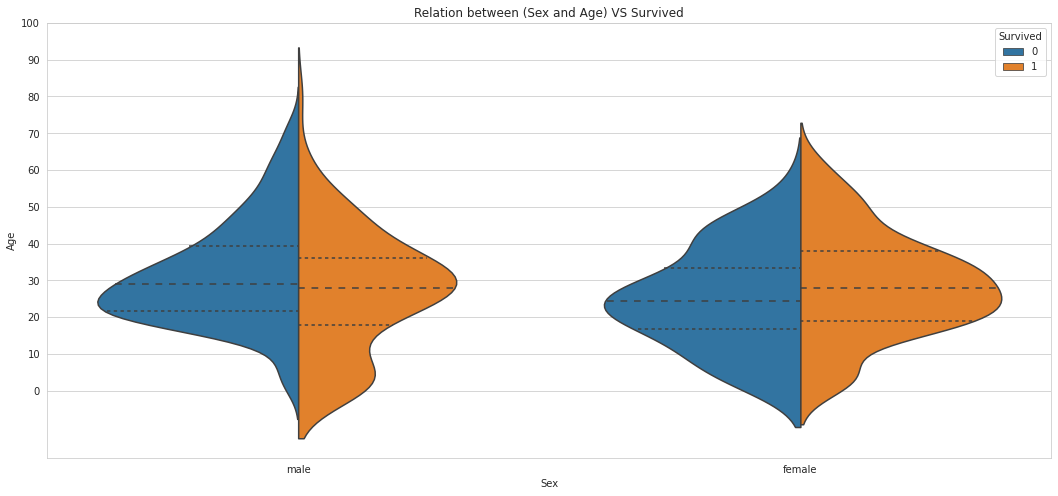

In [ ]:
fig, ax = plt.subplots(figsize = (18,8))
sns.set_style("whitegrid")
sns.violinplot("Sex","Age",hue="Survived",data=train_df, split =True, inner="quartile", ax=ax)
ax.set_title('Relation between (Sex and Age) VS Survived')
ax.set_yticks(range(0,110,10))
plt.show()

High probability of survival when male age between 18-35; In the case of female passenger High chance to survival age between 12 - 40.In both Age higher than 50 has lower chance to survived.<br><br>

<br>
<h5><b>We will handle missing age value by group of sex and Pclass median. Because Age feature relatad with sex and Pclass. Another reason behine this, famale passanger tend to have slightly lower median age than male.So, median age depend on sex and pclass.</b><h5>

In [ ]:
median_age_by_pclass_sex = all_data.groupby(['Sex','Pclass']).median()['Age']
for pclass in range(1,4):
  for sex in ['female','male']:
    print('Median of Pclass {} {}s: {}'.format(pclass,sex,median_age_by_pclass_sex[sex][pclass].astype(int)))

Median of Pclass 1 females: 36
Median of Pclass 1 males: 42
Median of Pclass 2 females: 28
Median of Pclass 2 males: 29
Median of Pclass 3 females: 22
Median of Pclass 3 males: 25


**Filling the null Age values with the medians age by Sex and Pclass groups**

In [ ]:
all_data['Age'] = all_data.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

<h4><b>Cabin</b><h4>

Cabin has lot of missing value. But we shount drop this feature. This feature also important for our model.Cabin feature tell us lots of important information about passenger. we will convert it as Deck by separate cabin's first one and fill null value by 'M'. 

In [ ]:
all_data['Deck'] = all_data['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'M')

all_data_deck = all_data.groupby(['Deck','Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 
                                                                        'Ticket']).rename(columns={'Name': 'Count'})
all_data_deck

Count
Deck Pclass       
A    1          22
B    1          65
C    1          94
D    1          40
     2           6
E    1          34
     2           4
     3           3
F    2          13
     3           8
G    3           5
M    1          67
     2         254
     3         693
T    1           1

Decks <b>A,B,C,</b> were only pclass 1 passenger.<br>
<b>B,C</b> and <b>M</b> Decks were for all classes.<br>
<b>F,G</b> Decks were pclass 1 and 2 passenger.<br>
<br>
<h6><b>T</b> Deck were only 1 class passenger so we will  move it in Deck A, as Deck A were only 1st class passenger.</h6>





In [ ]:
# Passenger in the T deck is changed to A
idx = all_data[all_data['Deck'] == 'T'].index
all_data.loc[idx, 'Deck'] = 'A'


* **A**, **B** and **C** decks are labeled as **ABC** because all of them have only Pclass 1.
* **D** and **E** decks are labeled as **DE** because they are from all passenger class.
* **F** and **G** decks are labeled as **FG** because they are from 2nd and 3rd class passenger.
* **M** deck is actually missing deck, so we keep it separately.

In [ ]:
all_data['Deck'] = all_data['Deck'].replace(['A','B','C'],'ABC')
all_data['Deck'] = all_data['Deck'].replace(['D','E'],'DE')
all_data['Deck'] = all_data['Deck'].replace(['F','G'],'FG')

all_data['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

We dont need Cabin feature so we will drop it

In [ ]:
all_data.drop(['Cabin'], inplace =True, axis = 1)

train_df , test_df = divide_df(all_data)
dfs_list = [train_df,test_df]

for df in dfs_list:
  print(train_df.isnull().sum())
  print('-'*30)


Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
Deck           0
dtype: int64
------------------------------
Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
Deck           0
dtype: int64
------------------------------


<b>Now there is no any missing data</b><br><br>

<h2><b>Data Visualization</b></h2>

<h3><b>Pclass<b><h3>

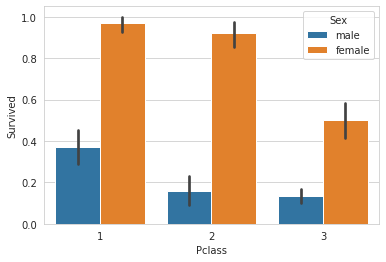

In [ ]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=train_df)

<br><b>Clearly we see that,probability of survived male passenger are lower than female passenger. so It is evident that, Women were given first priority while rescue.
In pclass 1, female passenger survival rate approximately 95% where male passenger survival rate 38%. And In pclass 3, probability of survival(male & female) rate lower than other pclass.</b><br><br>

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


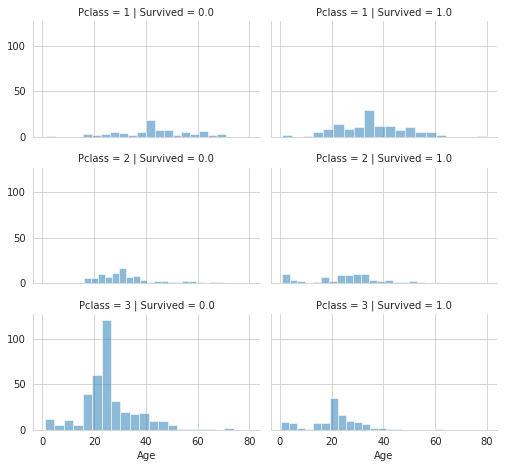

In [ ]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass',size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

**A person from pclass 1 has high probability of survive,and a person has low probability of survive in pclass 3.**

<h3><b>Family Size</b></h3>

sibsp:  # of siblings / spouses <br>
parch:  # of parents / children <br>
So family size would be Sibsp + Parch with include that person.<br>

In [ ]:
data1 = train_df.copy()
data1['FamilySize'] = data1['SibSp'] + data1['Parch'] + 1
data1['FamilySize'].value_counts().sort_values(ascending=False)

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

<b>observation: 537 people travel alone </b>

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


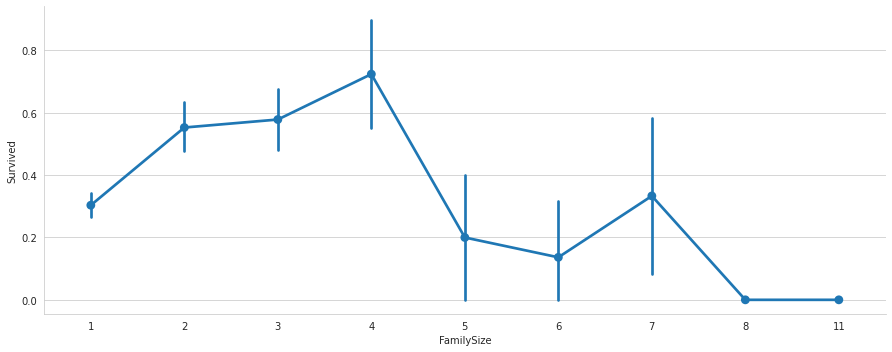

In [ ]:
axes = sns.factorplot('FamilySize','Survived', data=data1, aspect = 2.5, )

<b>Family Size 2 to 4 had High chance to survive, and less than 2 or more 4 size of family had less chance to survive</b> <br><br>

<h3><b>Embarked, Pclass and Sex<b><h3>

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


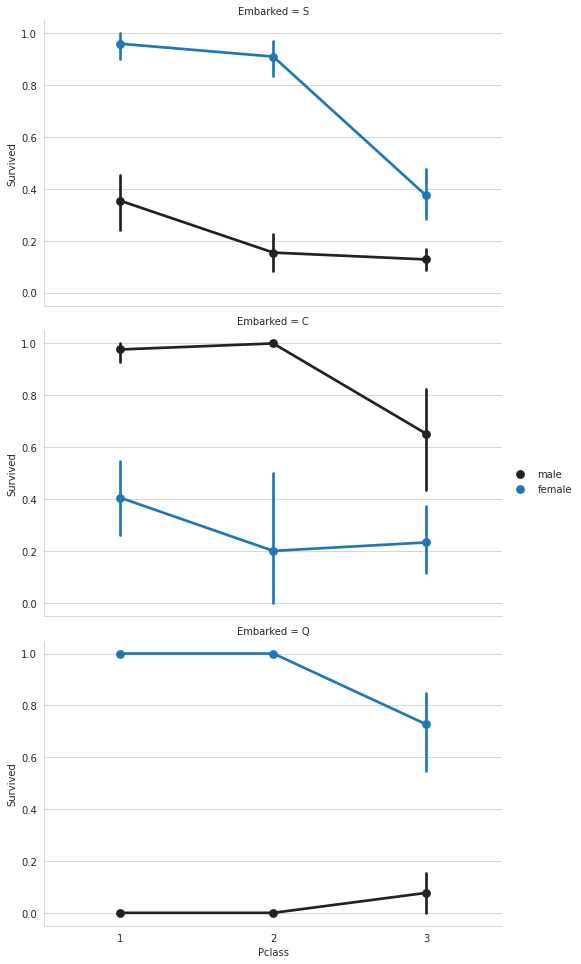

In [ ]:
FaceGrid = sns.FacetGrid(train_df, row='Embarked', size = 4.5, aspect=1.6)
FaceGrid.map(sns.pointplot,'Pclass','Survived','Sex', palette =None, oder=None, hue_oder=None)

FaceGrid.add_legend()

<b>Embarked also correlated with Survived feature depend on pclass and Sex.Embarked S and Q had high probability of survive Female, consequantly  Embarked C had high probability of survive Male in passenger class  1.</b> <br><br>

<br><b>Visualizing Embarked, Parch, Pclass, Sex, SibSp, Deck against Survived Feature</b><br>

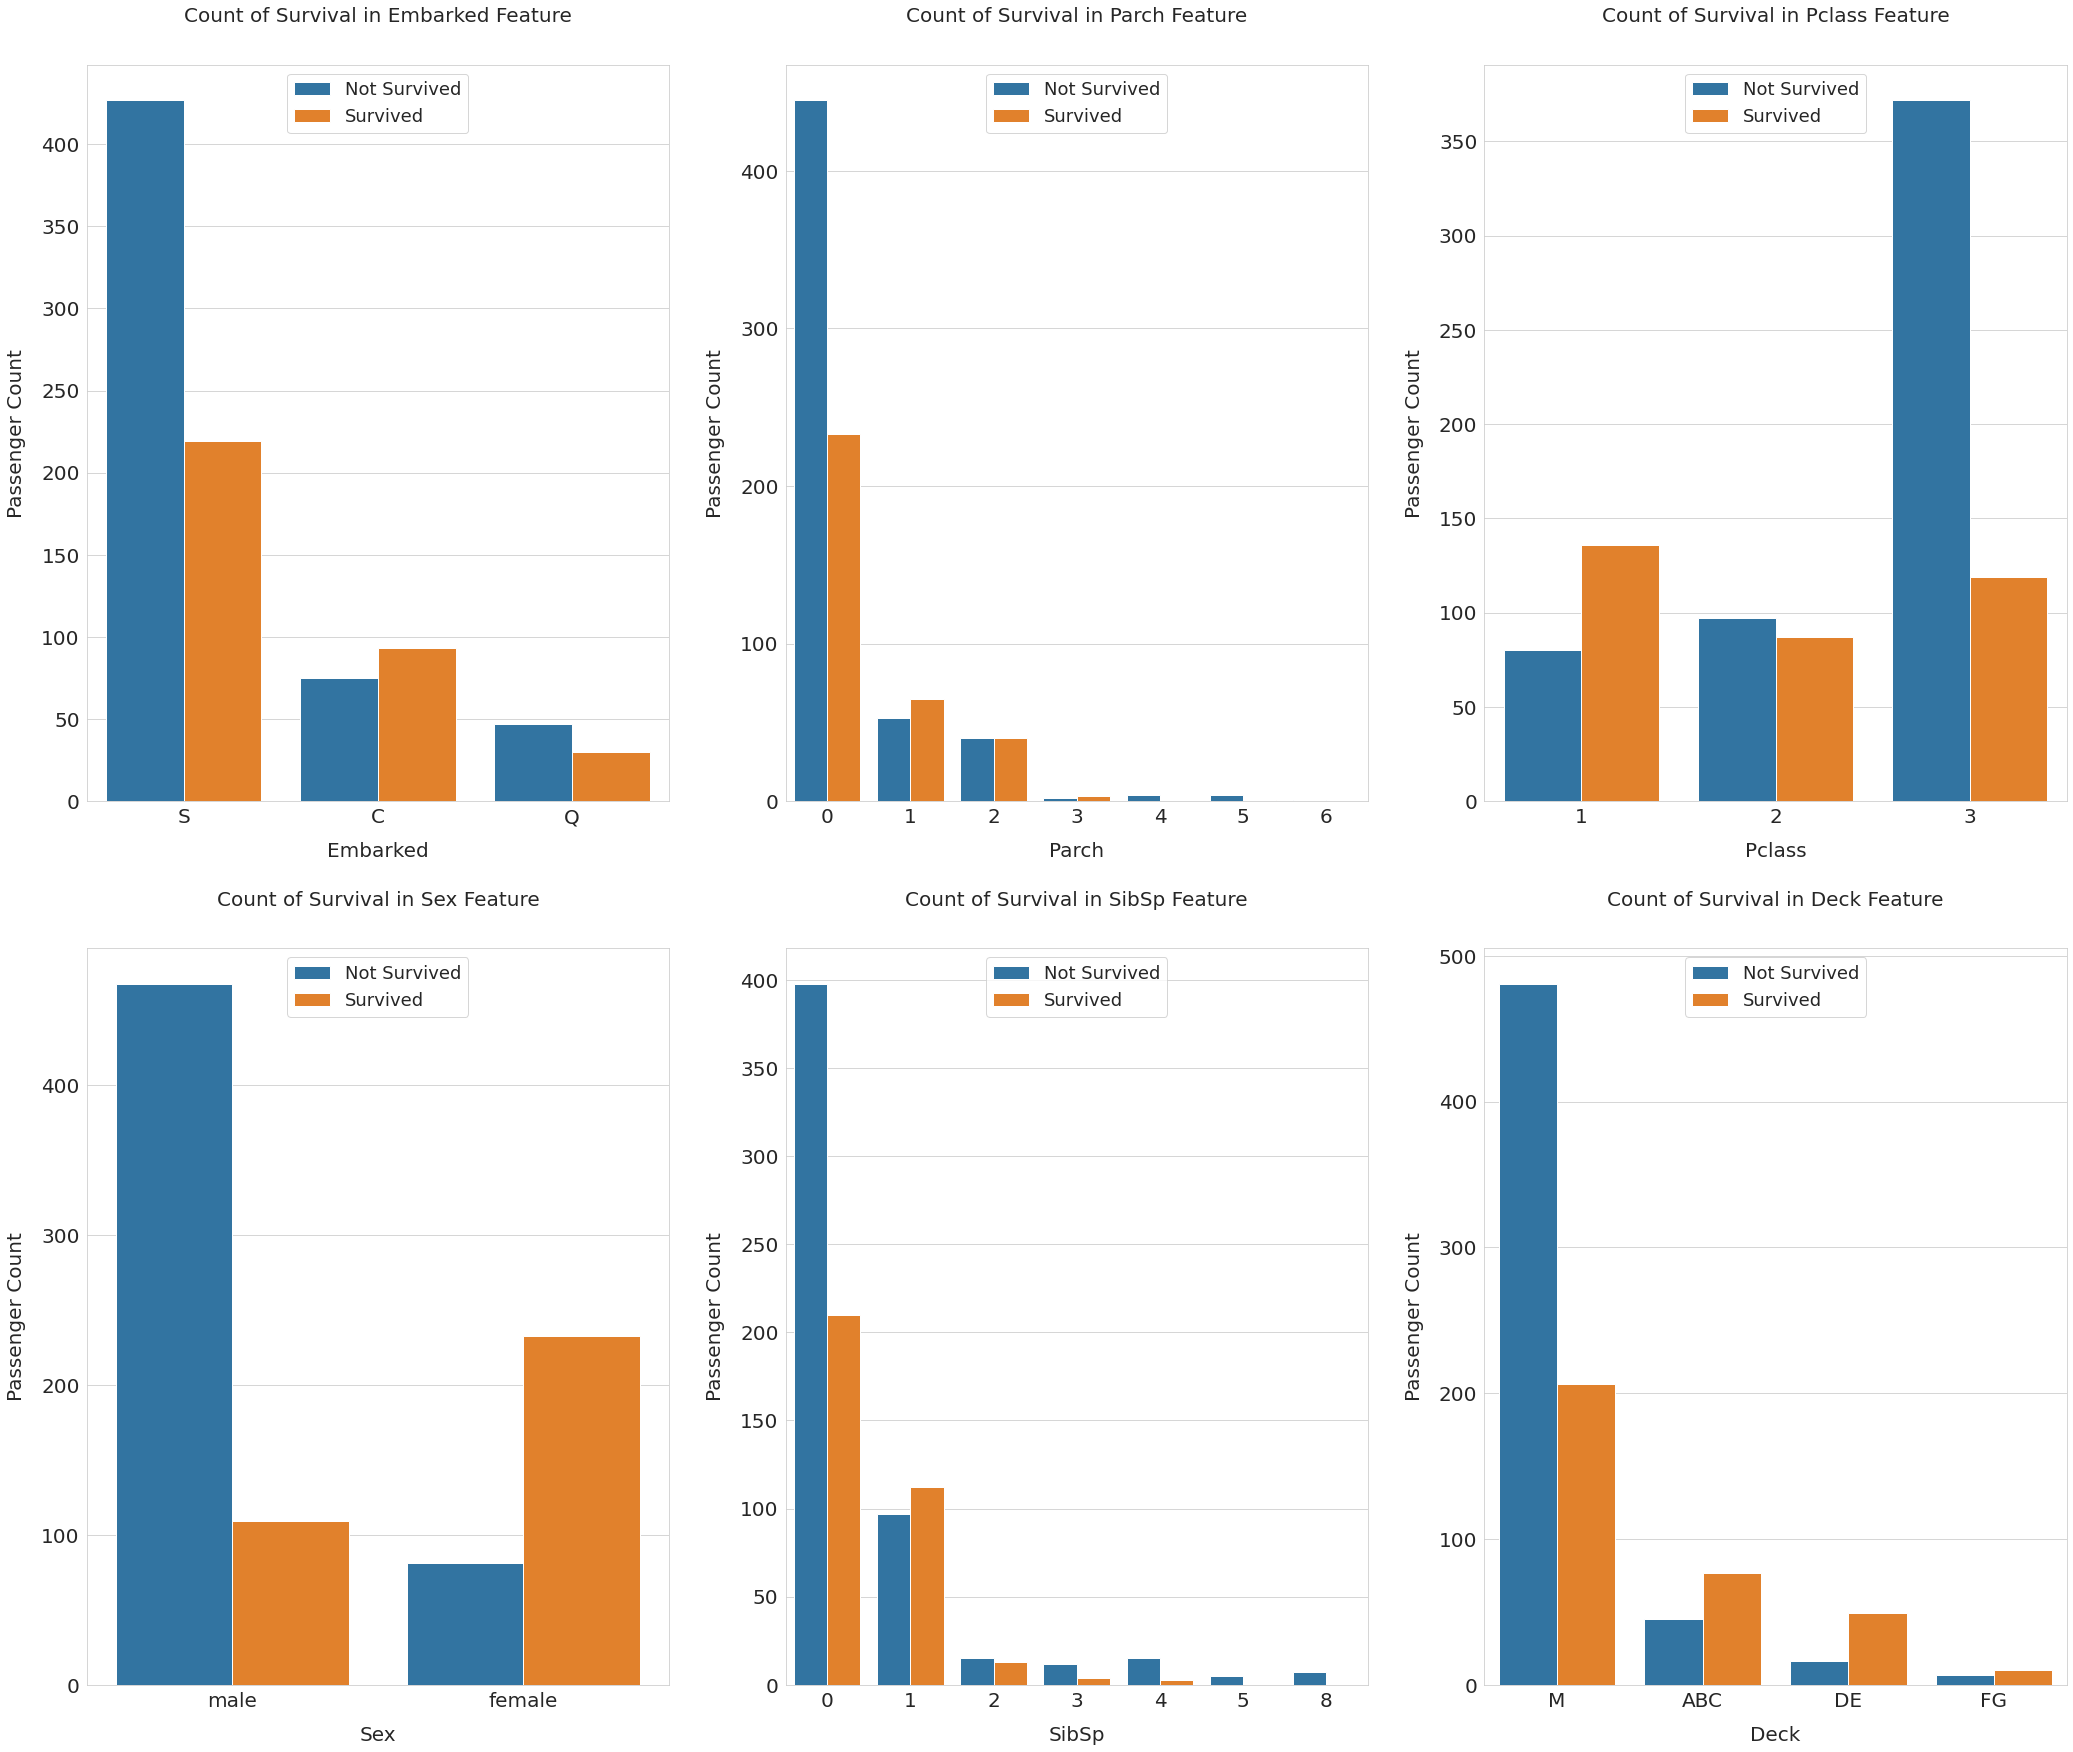

In [ ]:
cate_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Deck']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cate_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=train_df)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

Those Feature Correlated with Survived feature. We will make some feature by feature according this visualization<br><br>

<br><b>Agian Concat train and test set, keet it all_data DF<b>

In [ ]:
all_data = concat_df(train_df,test_df)
all_data.head()

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,M,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,ABC,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,M,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,ABC,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,M,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


<b>Correlation Between all The Features</b>

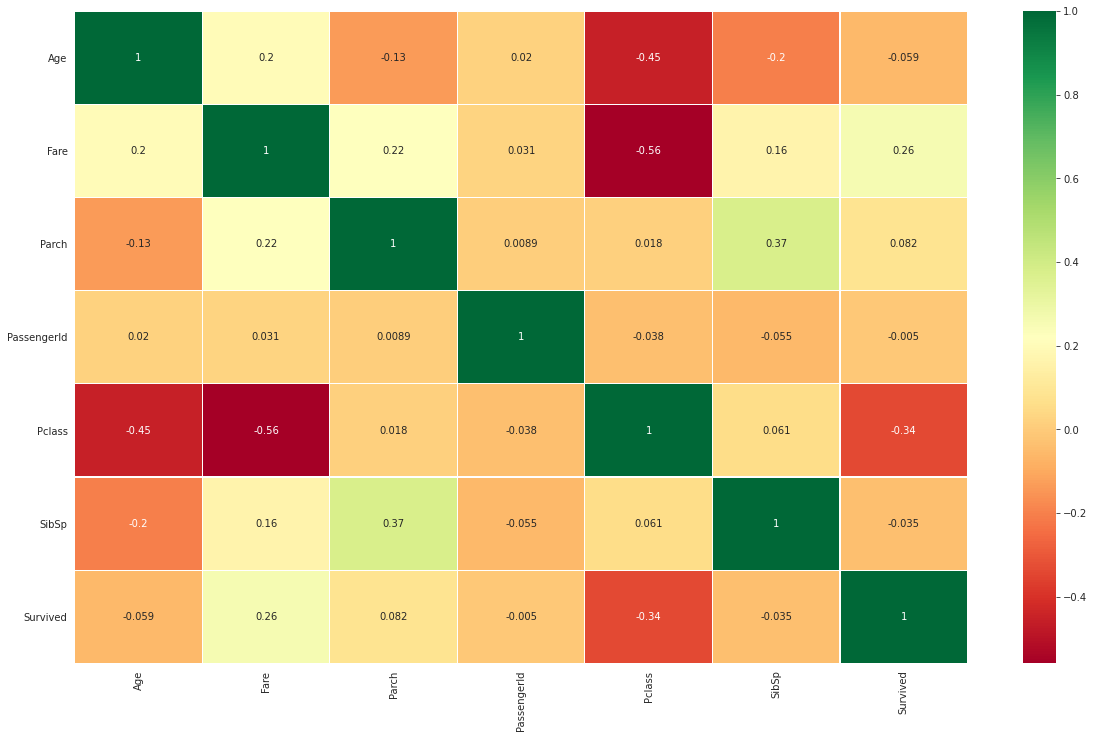

In [ ]:
sns.heatmap(all_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

<h1><b>Feature engineering</b></h1>

<h3><b>Age<b></h3><br>
<h4>Age feature cut into 10 quantile make it categorical feature, as it was continuous feature.</h4>

In [ ]:
all_data['Age'] = pd.qcut(all_data['Age'], 10)

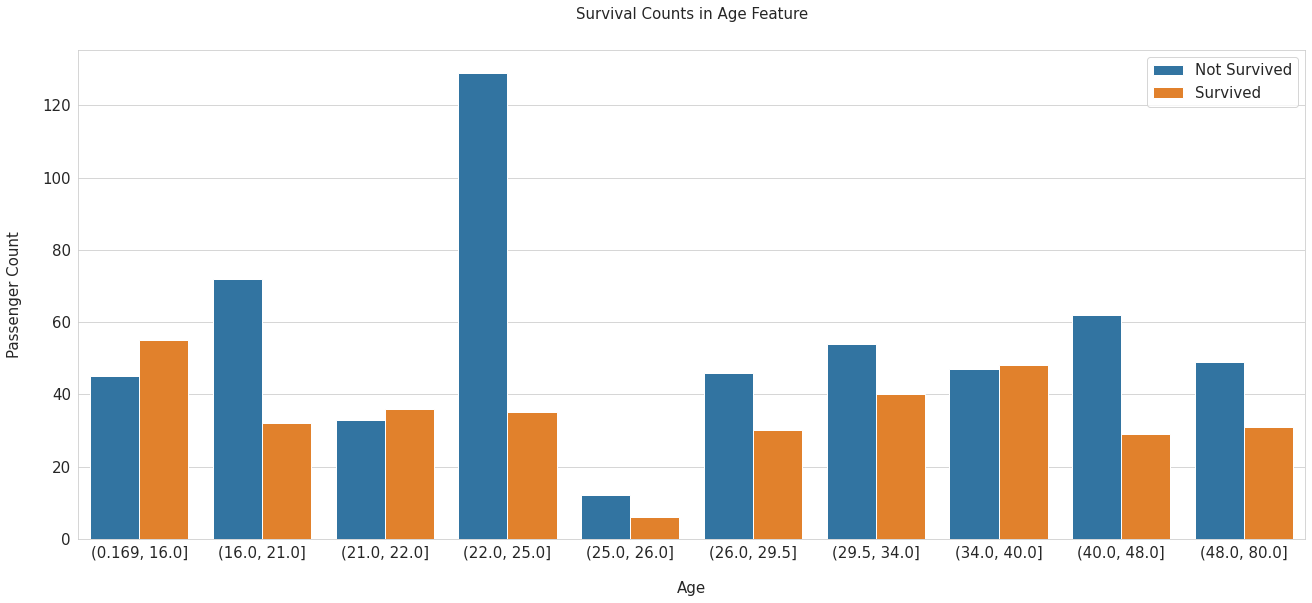

In [ ]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=all_data)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

<b>We see that  (34.0, 40.0] same survive and not survived rate,this kind of feature also important for our model</b>

<h3><b>Fare<b></h3><br>
<h4>Fare feature cut into 13 quantile make it categorical feature, as it was continuous feature</h4>

In [ ]:

all_data['Fare'] = pd.qcut(all_data['Fare'], 13)

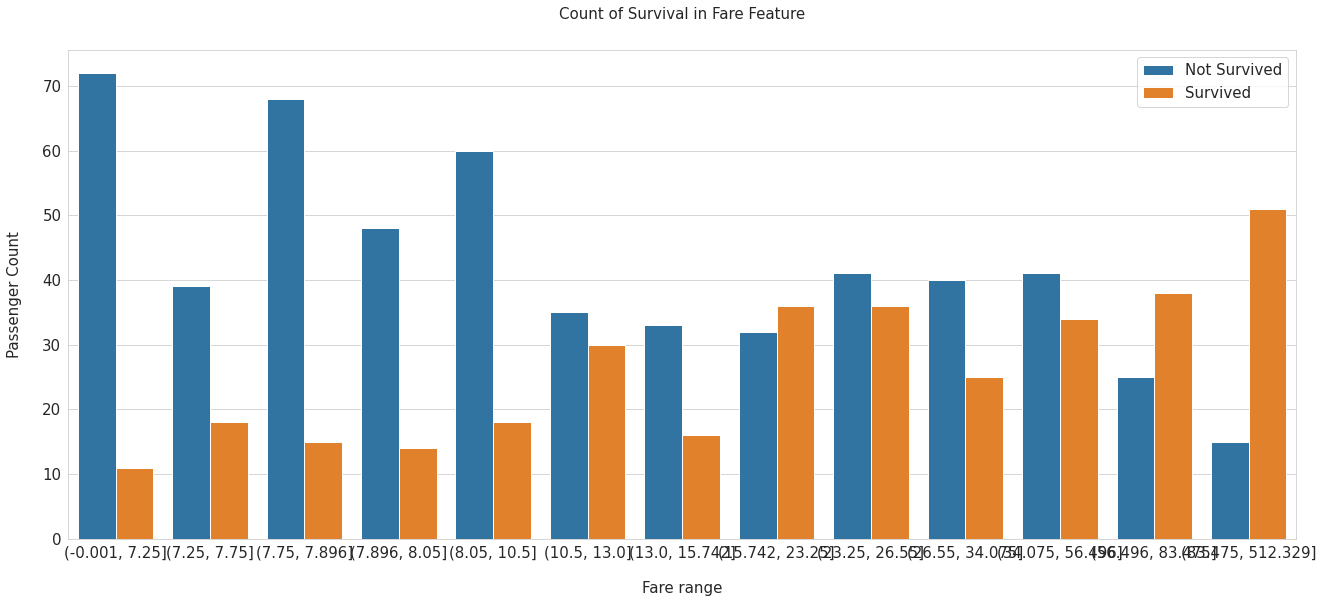

In [ ]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=all_data)

plt.xlabel('Fare range', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

<h3><b>Ticket</b></h3><br>

Ticket feature too much unique,so we will group it by their frequancies.

In [ ]:
all_data['Ticket_Frequency'] = all_data.groupby('Ticket')['Ticket'].transform('count')

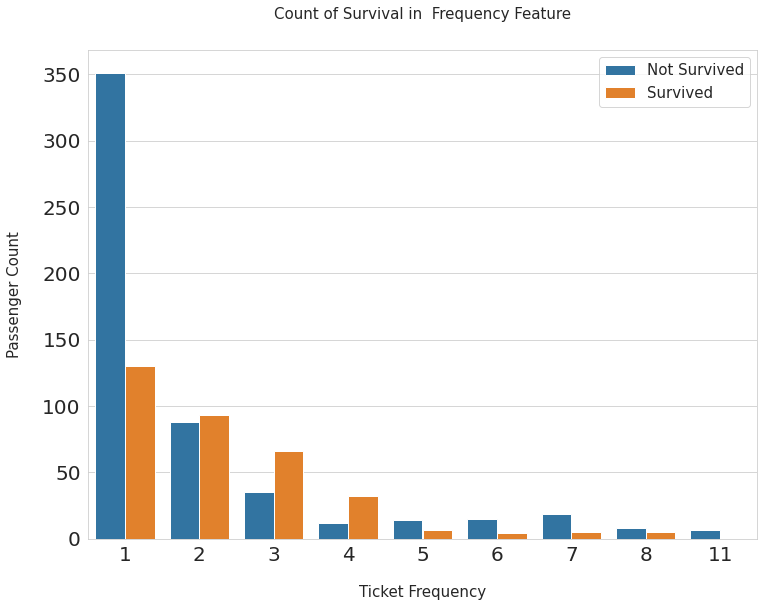

In [ ]:
fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=all_data)
plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format(' Frequency'), size=15, y=1.05)

plt.show()

<b>Frequency 1 has higher probability of not survive.A person who has Frequency 11 ticket, he/she has no chance to survive.<b><br>

<h3><b>Family Size</b></h3><br>

We make it categorical feature.<br>
<b>Family size 1: Alone<br>
Family Size 2,3,4: Small<br>
Family Size 5 up: Learge<br></b>

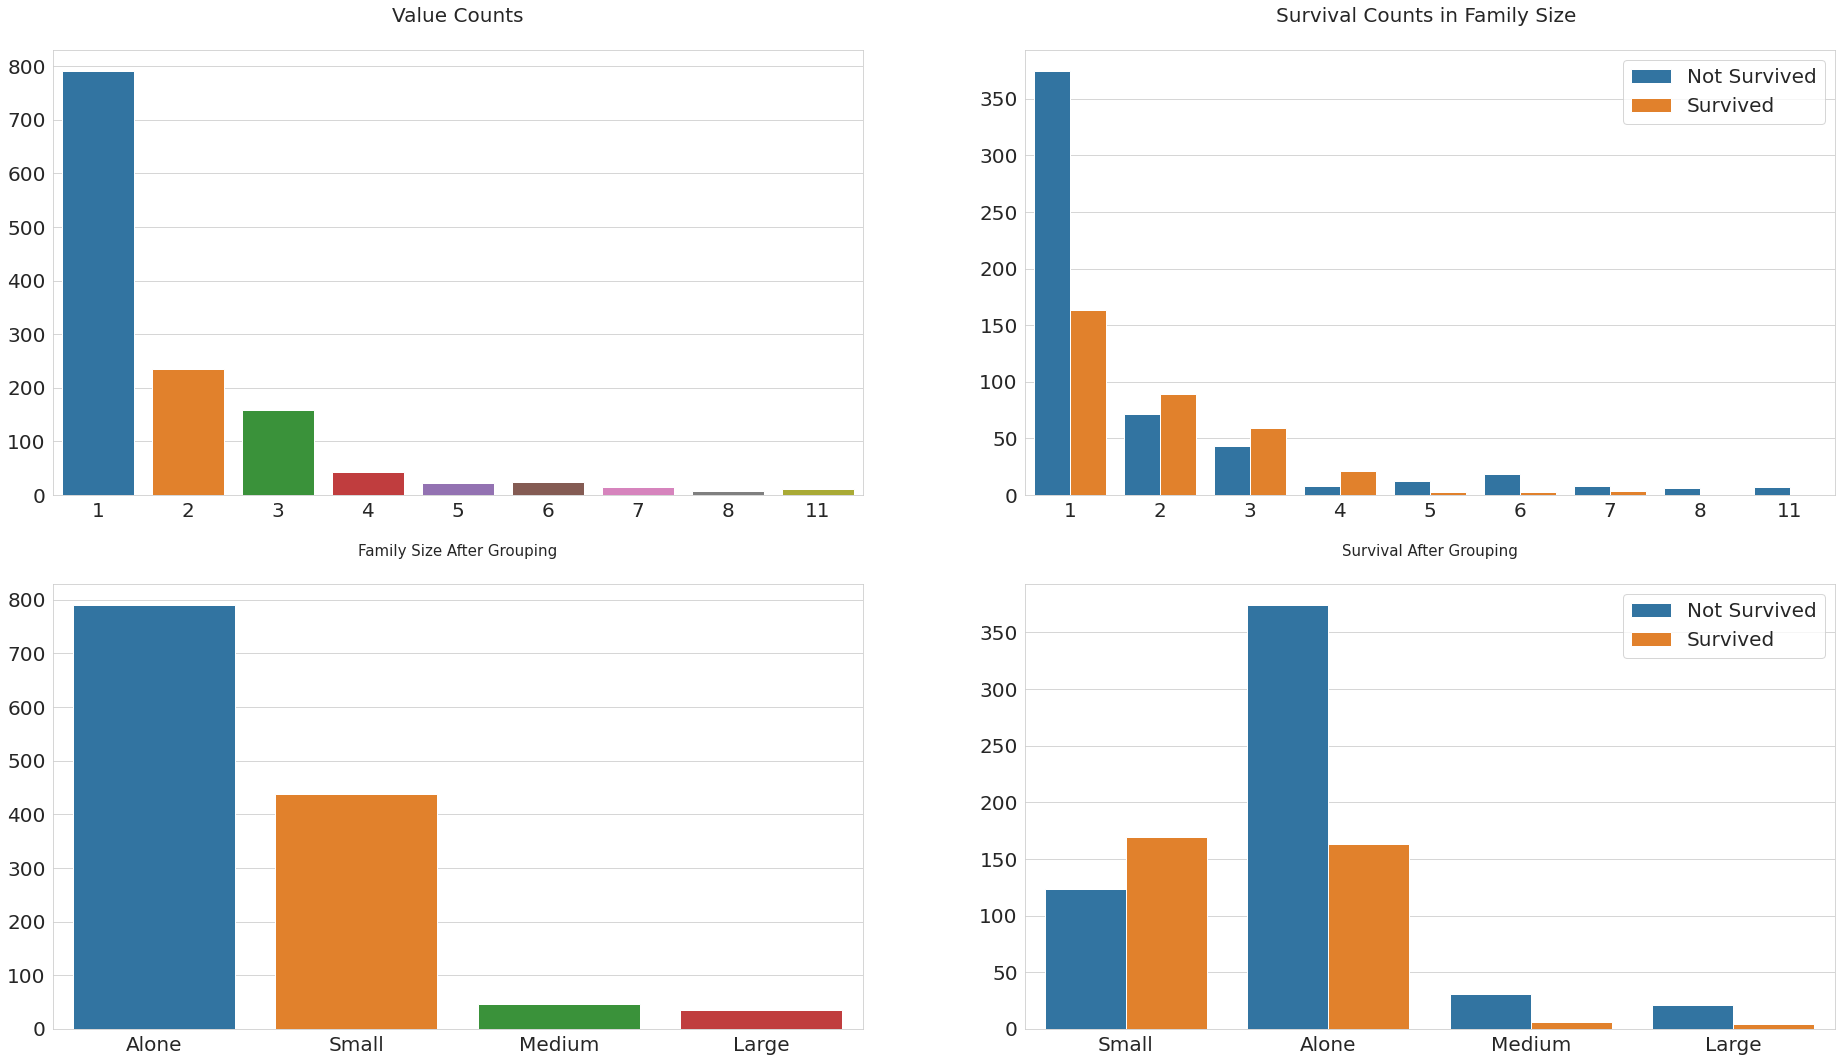

In [ ]:
all_data['Family_Size'] = all_data['SibSp'] + all_data['Parch'] + 1

fig, axs = plt.subplots(figsize=(18, 18), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=all_data['Family_Size'].value_counts().index, y=all_data['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=all_data, ax=axs[0][1])
axs[0][0].set_title('Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_view = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
all_data['Family_Size_Grouped'] = all_data['Family_Size'].map(family_view)

sns.barplot(x=all_data['Family_Size_Grouped'].value_counts().index, y=all_data['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=all_data, ax=axs[1][1])

axs[1][0].set_title('Family Size After Grouping', size=15, y=1.05)
axs[1][1].set_title('Survival After Grouping', size=15, y=1.05)
for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')
plt.show()
       

<h3><b>Title</b></h3><br>

<h5><b>First of we extract title from passenger name.Title split by ',' or '.' and Miss, Mrs, Ms, Mlle, Lady, Mme, the Countess, Dona titles are replaced with Miss/Mrs/Ms because all of them are female.'Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev' replaced with Dr/Military/Noble/Clergy'.We will find who was married by their title like 'Mrs'.</b></h5>

In [ ]:
all_data['Title'] = all_data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

all_data['Is_Married'] = 0
all_data['Is_Married'].loc[all_data['Title'] == 'Mrs'] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


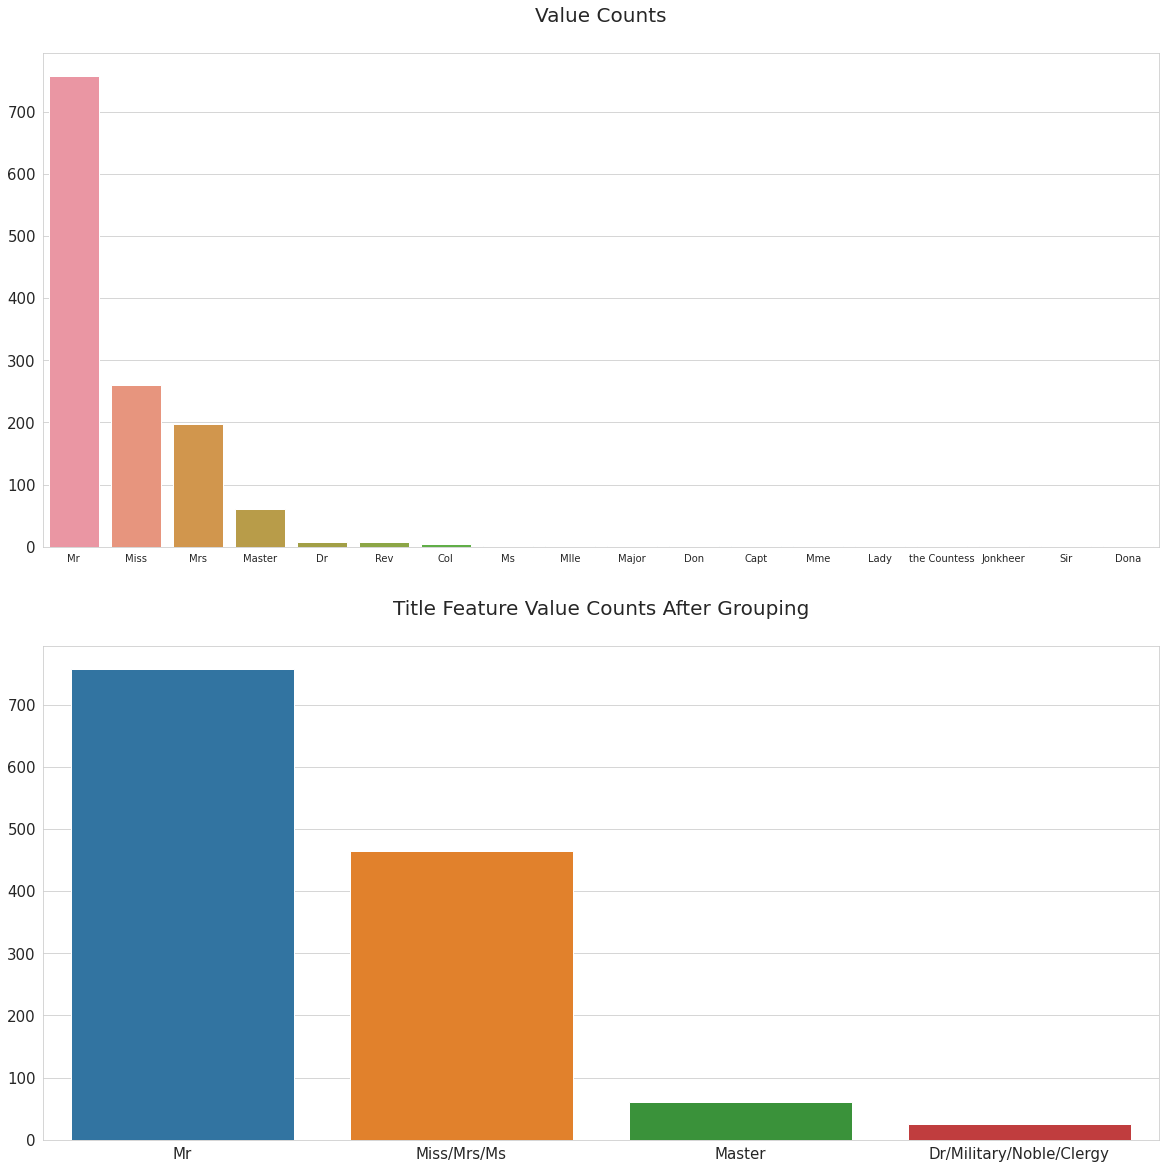

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=all_data['Title'].value_counts().index, y=all_data['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Value Counts', size=20, y=1.05)

all_data['Title'] = all_data['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
all_data['Title'] = all_data['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=all_data['Title'].value_counts().index, y=all_data['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

<h3>Family Survival Rate</h3>

<br><br>There are some passenger has one ticket for 2 or more people, so we can assume that they were connected. They might be family mamber but that not always true.Because some people travel with his friend ,mad, etc.  <br><br>

In [ ]:
def extract_surname(data):    
    
    families = []
    
    for i in range(len(data)):  
        name = data.iloc[i]

        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
            
        families.append(family)
            
    return families

all_data['Family'] = extract_surname(all_data['Name'])


In [ ]:
train_df , test_df = divide_df(all_data)
dfs_list = [train_df,test_df]


In [ ]:

non_unique_families = [x for x in train_df['Family'].unique() if x in test_df['Family'].unique()]
non_unique_tickets = [x for x in train_df['Ticket'].unique() if x in test_df['Ticket'].unique()]

df_family_survival_rate = train_df.groupby('Family')['Survived', 'Family','Family_Size'].median()
df_ticket_survival_rate = train_df.groupby('Ticket')['Survived', 'Ticket','Ticket_Frequency'].median()

family_rates = {}
ticket_rates = {}

for i in range(len(df_family_survival_rate)):
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]

for i in range(len(df_ticket_survival_rate)):
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Creating a list of families and tickets that are occuring in both training and test set then Checking a family exists in both training and test set, and has members more than 1, after that checking ticket who had more than one ticket.

In [ ]:
mean_survival_rate = np.mean( train_df['Survived'])

train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len( train_df)):
    if  train_df['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[ train_df['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
        
for i in range(len(test_df)):
    if test_df['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[test_df['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        
train_df['Family_Survival_Rate'] = train_family_survival_rate
train_df['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
test_df['Family_Survival_Rate'] = test_family_survival_rate
test_df['Family_Survival_Rate_NA'] = test_family_survival_rate_NA



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(train_df)):
    if train_df['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[train_df['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)
        
for i in range(len(test_df)):
    if test_df['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[test_df['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)
        
train_df['Ticket_Survival_Rate'] = train_ticket_survival_rate
train_df['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
test_df['Ticket_Survival_Rate'] = test_ticket_survival_rate
test_df['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**Ticket Survival Rate and Family Survival Rate**

In [ ]:
for df in dfs_list:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate']) / 2
    df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA']) / 2    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<h1><b>Feature Tranformation</b></h1>

<h2><b>Label Encoding </b></h2><br><br>

<b>Encode target labels with value between 0 and n_classes-1.LabelEncoder can be used to normalize Non-Numerical labels.</b>

In [ ]:
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs_list:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<h2><b>One-Hot Encoding</b></h2><br><br>

<b>we need to convert categorical columns to numerical columns so that a machine learning algorithm understands it. This process is called categorical encoding.'Sex','Pclass',  'Deck', 'Embarked', 'Family_Size_Grouped', 'Title' are object type.basically it covert into 0/1 matrix. </b>

In [ ]:
onehoten_features = ['Sex','Pclass',  'Deck', 'Embarked', 'Family_Size_Grouped', 'Title']
encoded_features = []

for df in dfs_list:
    for feature in onehoten_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)       
train_df = pd.concat([train_df, *encoded_features[:6]], axis=1)
test_df = pd.concat([test_df, *encoded_features[6:]], axis=1)

<br><br>Dropping Un-needed feature

In [ ]:
all_data = concat_df(train_df, test_df )
drop_cols = ['Deck', 'Embarked', 'Family', 'Family_Size', 'Family_Size_Grouped', 'Survived',
             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title',
            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA']
all_data.drop(columns=drop_cols, inplace=True)

In [ ]:
test_drop_cols = ['Deck', 'Embarked', 'Family', 'Family_Size', 'Family_Size_Grouped',
             'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title',
            'Ticket_Survival_Rate', 'Family_Survival_Rate', 'Ticket_Survival_Rate_NA', 'Family_Survival_Rate_NA']

<h2><b>Correlation Between The Features<b></h2>

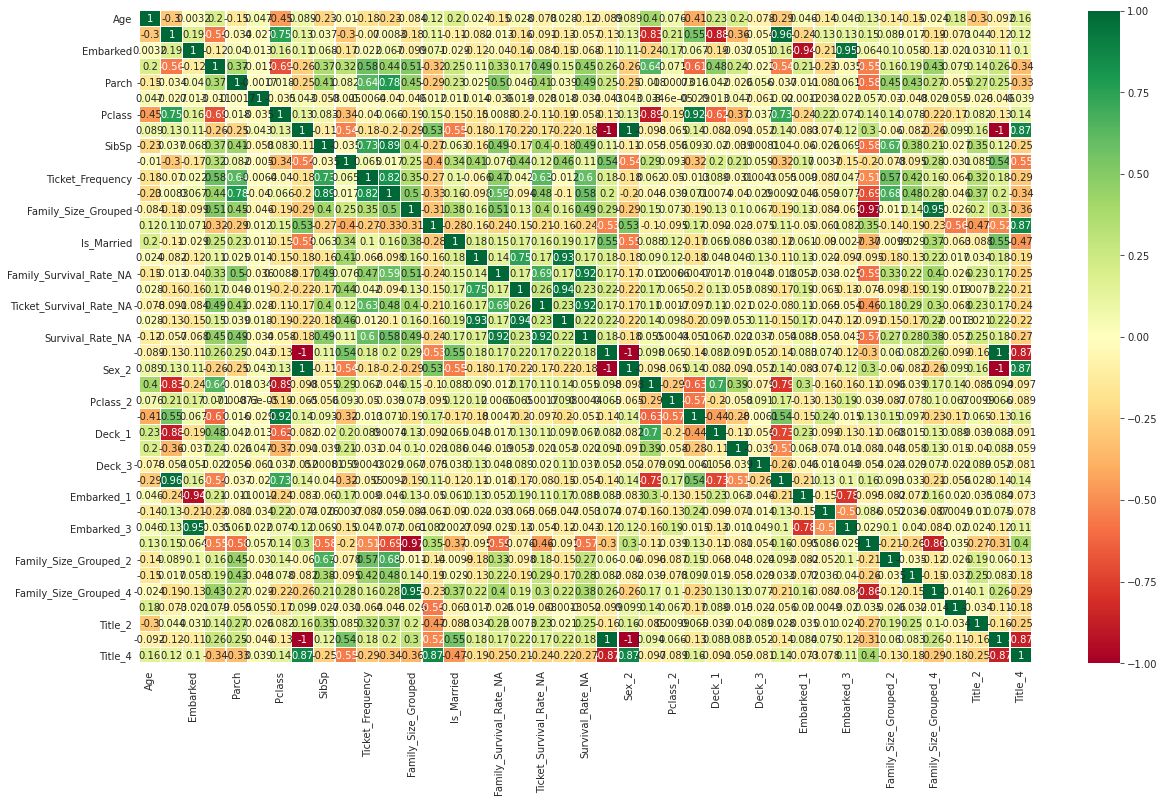

In [ ]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

## Machine Learning Models

X keep train data frame without un-needed column

In [ ]:
X = train_df.drop(columns=drop_cols)

Standardize features by removing the mean and scaling to unit variance

In [ ]:
all_features = StandardScaler().fit_transform(X)
Targeted_feature= train_df['Survived'].values
test_X = StandardScaler().fit_transform(test_df.drop(columns=test_drop_cols))

print('X_train shape: {}'.format(all_features.shape))
print('Y_train shape: {}'.format(Targeted_feature.shape))
print('X_test shape: {}'.format(test_X.shape))

X_train shape: (891, 26)
Y_train shape: (891,)
X_test shape: (418, 26)


<b>Split fuction X_train,X_test,y_train,y_test set by all feature and target feature<b>

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 26), (268, 26), (623,), (268,))

<br><br> 
<b>This function show accuracy of model and confustion matrics<b>

In [ ]:
def model_accuracy(model,all_feature,Targeted_feature):
  X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
  
  #Model Acuuracy 
  print('The accuracy of the Model is',round(model.score(X_train, y_train)*100,2), "%")

  kfold = KFold(n_splits=10, random_state=22)
  cross_scores=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
  print('Cross validation [Mean] :',round(cross_scores.mean()*100,2),'%')
  print('Cross validation [Scores] :',cross_scores)
  print('Cross validation [Standard Deviation] :',cross_scores.std())

  y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
  sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
  plt.title('Confusion matrix', y=1.05, size=15)

<h3>This is binary classification problem. So here I use those algorithm to find best accuracy model.
</h3>

1.   Logistic Regression
2.   stochastic gradient descent (SGD)
3.   Random Forrest
4.   Decision Tree
5.   KNN
6.   Support Vector Machines



**Logistic Regression**

--------------The Accuracy of the LogisticRegression model----------------------------
The accuracy of the Model is 87.48 %


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Cross validation [Mean] : 85.07 %
Cross validation [Scores] : [0.85555556 0.8988764  0.78651685 0.88764045 0.83146067 0.79775281
 0.82022472 0.82022472 0.92134831 0.88764045]
Cross validation [Standard Deviation] : 0.043835411434131666


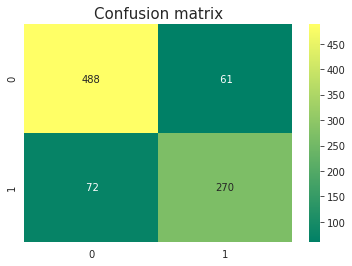

In [ ]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print('--------------The Accuracy of the LogisticRegression model----------------------------')
model_accuracy(logreg,all_features,Targeted_feature)

**stochastic gradient descent**

--------------The Accuracy of the stochastic gradient descent model----------------------------
The accuracy of the Model is 81.7 %
Cross validation [Mean] : 80.24 %
Cross validation [Scores] : [0.84444444 0.86516854 0.69662921 0.68539326 0.79775281 0.74157303
 0.78651685 0.83146067 0.86516854 0.91011236]
Cross validation [Standard Deviation] : 0.07137633509565783


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


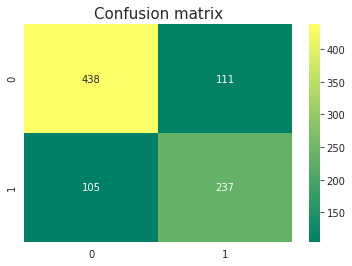

In [ ]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
print('--------------The Accuracy of the stochastic gradient descent model----------------------------')
model_accuracy(sgd,all_features,Targeted_feature)

**Random forest**

--------------The Accuracy of the Random Forest model----------------------------
The accuracy of the Model is 95.83 %


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Cross validation [Mean] : 83.39 %
Cross validation [Scores] : [0.81111111 0.83146067 0.76404494 0.87640449 0.84269663 0.85393258
 0.83146067 0.78651685 0.88764045 0.85393258]
Cross validation [Standard Deviation] : 0.03637413771081421


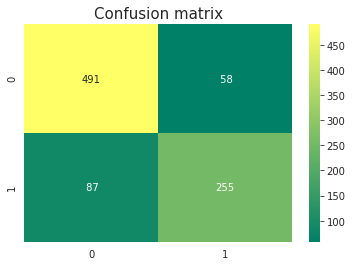

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)
print('--------------The Accuracy of the Random Forest model----------------------------')
model_accuracy(random_forest,all_features,Targeted_feature)

**Decisionc tree**

--------------The Accuracy of the Decisionc tree model----------------------------
The accuracy of the Model is 95.83 %
Cross validation [Mean] : 81.26 %
Cross validation [Scores] : [0.78888889 0.82022472 0.74157303 0.85393258 0.84269663 0.76404494
 0.80898876 0.79775281 0.87640449 0.83146067]
Cross validation [Standard Deviation] : 0.039111615536694025


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


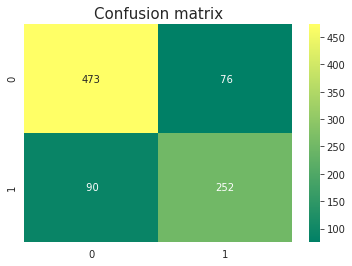

In [ ]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
print('--------------The Accuracy of the Decisionc tree model----------------------------')
model_accuracy(decision_tree,all_features,Targeted_feature)

**Support Vector Machines**

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


--------------The Accuracy of the Support Vector Machine model----------------------------
The accuracy of the Model is 86.36 %


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Cross validation [Mean] : 84.85 %
Cross validation [Scores] : [0.85555556 0.88764045 0.78651685 0.88764045 0.83146067 0.79775281
 0.82022472 0.83146067 0.91011236 0.87640449]
Cross validation [Standard Deviation] : 0.03935203336886336


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

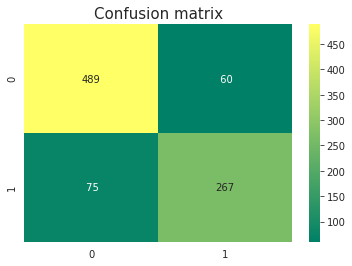

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
print('--------------The Accuracy of the Support Vector Machine model----------------------------')
model_accuracy(linear_svc,all_features,Targeted_feature)

**knn**

--------------The Accuracy of the K Nearest Neighbor model----------------------------
The accuracy of the Model is 89.89 %
Cross validation [Mean] : 81.59 %
Cross validation [Scores] : [0.81111111 0.82022472 0.75280899 0.82022472 0.83146067 0.82022472
 0.84269663 0.79775281 0.82022472 0.84269663]
Cross validation [Standard Deviation] : 0.02466936888014946


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


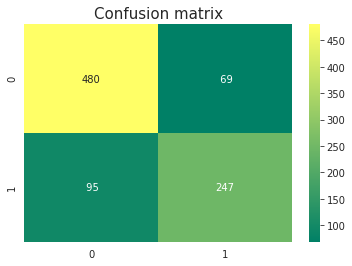

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
print('--------------The Accuracy of the K Nearest Neighbor model----------------------------')
model_accuracy(knn,all_features,Targeted_feature)

<h1><b>Model Selection<b></h1><br><br><h3>By looking all the accuracy score, we can see that <b>Random Forest and Desicion tree</b> has higher score than others.Now I choose Random forest and work on it.<h3><br><br>

<h2><b>Random Forest</b></h2>

<h2>Feature Importance<h2>
<p>A great quality of random forest is they can measure importance features</p>

In [ ]:
importance = pd.DataFrame({
    'feature': X.columns,
    'importance' :np.round(random_forest.feature_importances_,3)
})

importance = importance.sort_values('importance', ascending=False).set_index('feature')

importance.head(26)

,importance
feature,
Age,0.135
Fare,0.107
Survival_Rate,0.095
Sex_2,0.093
Title_4,0.081
Title_3,0.078
Ticket_Frequency,0.061
Sex_1,0.054
Pclass_3,0.047


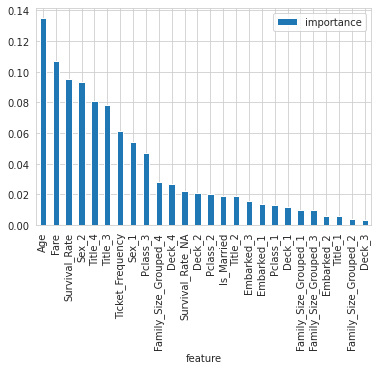

In [ ]:
importance.plot.bar()

Age is the higher importan feature

<h1><b>Hyperparameter Tuning</b></h1><br>


Here I use GirdSeach to find hyperparameter.<br><b>Set parameter:</b><br> minimum sample leaf 1,5,10.<br> min samples_ plit : 2, 4, 10.<br> n_estimators: 100, 500, 1000,11000, 1500.

In [ ]:
# from sklearn.model_selection import GridSearchCV
# param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10], "n_estimators": [100, 500, 1000,11000, 1500]}


# clf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=param_grid,verbose=True)

# clf.fit(all_features, Targeted_feature)

# print(clf.best_score_) 
# print(clf.best_estimator_)

Its take some time to process

<h2><b>Apply the Estimator which got from parameter tuning of Random Forest<b></h2>


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=42,
                                           n_jobs=-1,
                                           verbose=1)
random_forest.fit(all_features,Targeted_feature)
Y_prediction = (random_forest.predict(test_X)).astype(int)
random_forest.score(all_features,Targeted_feature)
acc_random_forest = round(random_forest.score(all_features,Targeted_feature) * 100, 2)


print(acc_random_forest)
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    2.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1100 out of 1100 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s


85.63
oob score: 84.74000000000001 %


[Parallel(n_jobs=2)]: Done 1100 out of 1100 | elapsed:    0.4s finished


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s


--------------The Accuracy of the K Nearest Neighbor model----------------------------


[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1100 out of 1100 | elapsed:    0.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


The accuracy of the Model is 85.23 %


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 904 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    2.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1100 out of 1100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1060 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks    

Cross validation [Mean] : 85.07 %
Cross validation [Scores] : [0.86666667 0.91011236 0.7752809  0.87640449 0.86516854 0.80898876
 0.84269663 0.79775281 0.88764045 0.87640449]
Cross validation [Standard Deviation] : 0.04120129374265155


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1060 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1100 out of 1100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1060 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks   

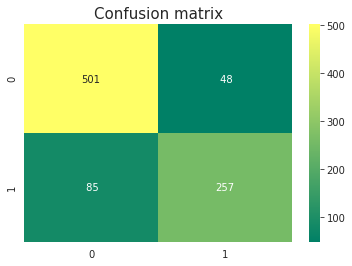

In [ ]:
print('--------------The Accuracy of the Final model----------------------------')
model_accuracy(random_forest,all_features,Targeted_feature)

<b>Cross Validation Score improved! This is our final model.<b><br>,<br>

In [ ]:
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": Y_prediction
})
submission.to_csv('submission.csv', index=False)